# Simple Inventory Example

This is our most basic example and models a production planning problem with one kind of product and random demand.

In [1]:
from pyquasar import *

In [4]:

model = DecisionProblem("Production").maximize()
process = UnivariateGBM(
    "Demand", 25, 0, 1, 
)

initInventory = 20
numStages = 20
for t in range(numStages):
    inventory, produce, sell = model.add_variables(
        t, "inventory", "produce", "sell")

    #objective function
    model += 5*sell - 3*produce - 0.5*inventory

    #inventory balance
    model += inventory == (oldInventory if t > 0 else initInventory) - sell + produce

    #bounds
    model += sell <= rand("Demand")
    model += sell <= inventory
    model += produce <= 20
    oldInventory = inventory

With the model and processes set up, it's time to set them up as lattice and create a new `DynamicOptimizer` instance to solver our model.

In [5]:
lat = Lattice(process, numStages, sample_size=1000)
opt = DynamicOptimizer(model, lat, linear_solver='clp')
opt.solve()

Solving happens in a separate thread to allow you to keep working in the main notebook. You can still check after the status of your optimization. Since this is a simple example, it should be finished quickly. Now you can look at results and plot outcomes.

In [6]:
sim = opt.policy.simulate()

In [7]:
sim.head()

rewards   decision                       shadow_price  \
                rewards       sell  inventory    produce    inventory   
series stage                                                            
0      0      30.000000  20.000000  20.000000  20.000000     3.672644   
       1      43.117745  11.254837  11.254837   2.509674     3.219870   
       2      10.323383  15.627418  15.627418  20.000000     3.958980   
       3      32.167025   7.269224   8.358194   0.000000     2.976170   
       4      11.302844   2.814898   5.543296   0.000000     3.122307   

                  state  
                 Demand  
series stage             
0      0      25.000000  
       1      11.254837  
       2      30.348647  
       3       7.269224  
       4       2.814898

The table above shows outcomes for multiple stages of a single simulation run. This data is generally more useful when looking at it in aggregate, as with a fanchart below or by calculating quantiles.

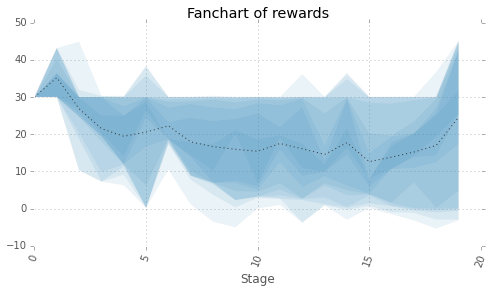

In [8]:
sim.rewards.fanchart()